<a href="https://colab.research.google.com/github/igt14/Autolib_HypothesisTesting/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2021_09_Ian_Gathumbi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# Importing the libraries that we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1.1 Loading the data

In [2]:
# Loading the Data from the source 
# Dataset url = http://bit.ly/DSCoreAutolibDataset
autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

# 1.2 Checking the data

In [3]:
# Determining the no. of records in our dataset
autolib.shape

(16085, 13)

In [4]:
# Accessing information about our dataset
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [5]:
# Previewing the top of our dataset
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
# Previewing the bottom of our datasest
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


# 1.3 Cleaning the data

## 1.3.1 Missing values

In [7]:
# Checking for missing values
autolib.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

## 1.3.2 Duplicates

In [8]:
# Checking for duplicates
autolib.duplicated().any()

False

## 1.3.3 Column types

In [9]:
# Checking column types
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [10]:
# Converting date column from string to a datetime 
autolib['date'] = pd.to_datetime(autolib['date'], format= '%m/%d/%Y')

# Checking if it worked
autolib['date'].dtypes

dtype('<M8[ns]')

# 1.4 Exploratory data analysis

## 1.4.1 Univariate

In [15]:
# Grouping by date to find the sum of cars taken each day from all postal codes
autolib_date = autolib.groupby(['date']).sum().iloc[:, 3:].reset_index()
autolib_date.head()

,date,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,2018-01-01,12281,12281,372,370,874,856,1964,1951
1,2018-01-02,10038,9962,280,276,656,661,1627,1643
2,2018-01-03,11460,11419,322,331,708,706,1852,1838
3,2018-01-04,10157,10130,280,291,646,649,1659,1667
4,2018-01-05,12259,12187,372,378,843,842,2085,2060


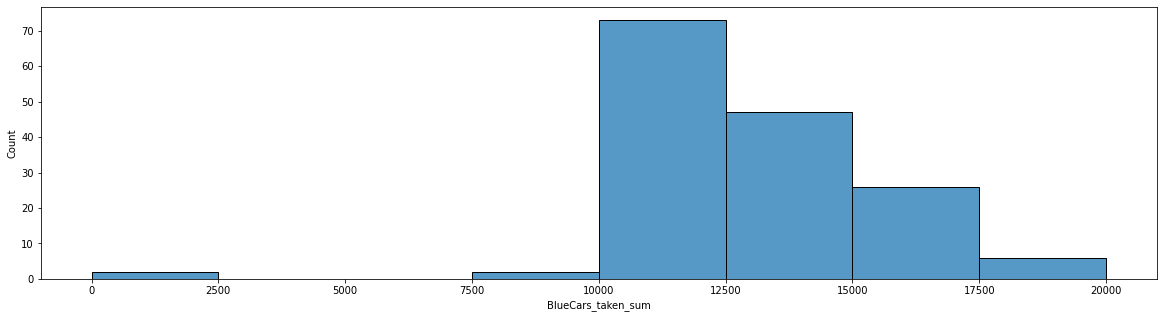

In [25]:
# Creating a histogram
plt.figure(figsize=(20, 5))
# Creating our bins
bins = []
for x in range(0, 20001, 2500):
  bins.append(x)
sns.histplot(data=autolib_date, x='BlueCars_taken_sum', bins=bins)
plt.show()

In most days, 10,000 to 12,500 blue cars were taken 

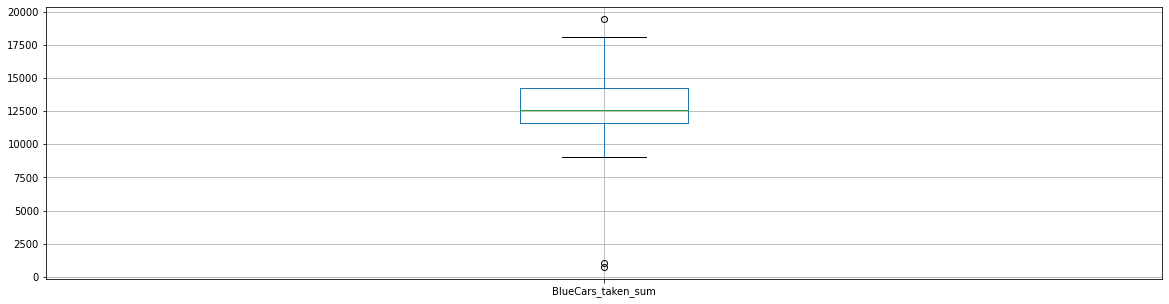

In [26]:
# Creating a boxplot
plt.figure(figsize=(20, 5))
autolib_date.boxplot(['BlueCars_taken_sum'])
plt.show()

The median of blue cars taken in a day was about 12,500

## 1.4.2 Bivariate

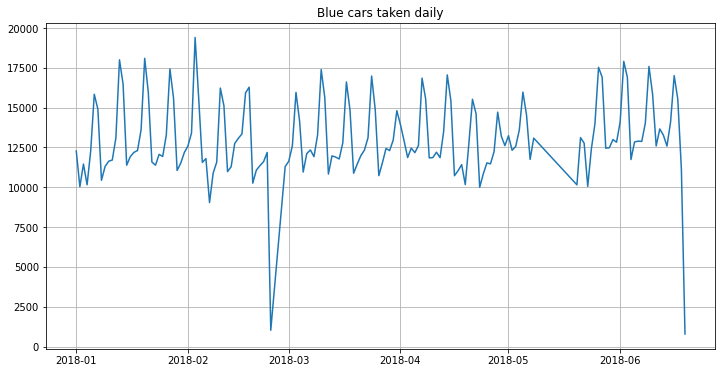

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(autolib_date['date'], autolib_date['BlueCars_taken_sum'])
plt.title("Blue cars taken daily")
plt.grid(True)
plt.show()

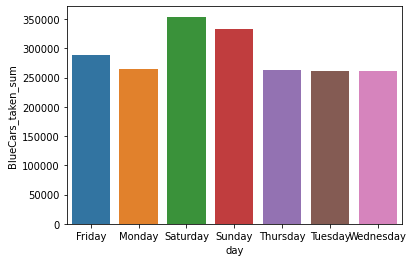

<Figure size 432x1440 with 0 Axes>

In [69]:
autolib['day'] = autolib['date'].dt.strftime('%A')
autolib_day = autolib.groupby('day', as_index=False).sum()
sns.barplot(x='day', y='BlueCars_taken_sum', data=autolib_day)
plt.figure(figsize=(6,20))
plt.show()

Saturday is our busiest day 

# 1.5 Hypothesis testing

Is there a statistically significant difference in blue cars taken in postal codes 75015 and 75016 on weekends?

H0: There is no significant difference between the mean number of blue cars taken in 75015 and 75016 on weekends

H1: There is significant difference between the mean number of blue cars taken in 75015 and 75016 on weekends
 
We will conduct an independent two sample t test to find out

In [43]:
# Splitting our data into two groups: 75015 and 75016
x = autolib[(autolib['Postal code'] == 75015) & (autolib['day_type'] == 'weekend')]
y = autolib[(autolib['Postal code'] == 75016) & (autolib['day_type'] == 'weekend')]

In [44]:
# Finding out the number of records in x and y
print(x.shape, y.shape)

(44, 14) (44, 14)


In [45]:
# To conduct an independent sample t test some assumptions need to be met
# The first being that the two groups are independent which is true in our case because the number of blue cars taken in one location is unrelated to
# the number of blue cars taken in another location
#
# The second assumption is that there are no significant outliers 
# Creating a function to detect and deal with outliers
def outlier(df, column):
    threshold=3
    mean_1 = np.mean(df[column])
    std_1 =np.std(df[column])
    
    for y in df[column]:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            df = df[df[column] != y]
    return df

In [46]:
x = outlier(x, 'BlueCars_taken_sum')
x.shape

(43, 14)

In [47]:
y = outlier(y, 'BlueCars_taken_sum')
y.shape

(43, 14)

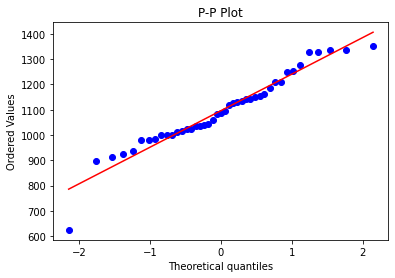

In [51]:
# The third assumption is that the data for each group should be approximately normally distributed
# We will draw q-q plot to find out
stats.probplot(x['BlueCars_taken_sum'], plot= plt)
plt.title('P-P Plot') 
plt.show()

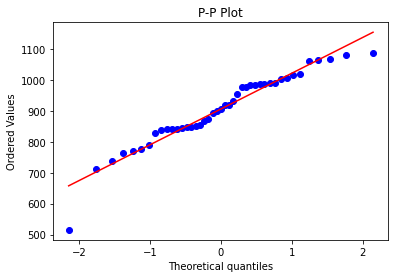

In [52]:
stats.probplot(y['BlueCars_taken_sum'], plot= plt)
plt.title('P-P Plot') 
plt.show()

Majority of points in both x and y are more or less along the red line therefore we can conclude that the number of blue cars taken is randomly distributed.

In [54]:
# Conducting the independent sample t test
test_statistic, p_value = stats.ttest_ind(x['BlueCars_taken_sum'], y['BlueCars_taken_sum'])
print(test_statistic, p_value)

6.742245001228171 1.8501867639353618e-09


Our p value is small therefore we reject the null hypothesis

# 1.6 Point Estimation

Our parameters of interest are mean number of blue cars taken in 75015 and 75016 on weekends as well as the their difference

In [59]:
# Mean number of blue cars taken in 75015 on weekends
mean_x = x['BlueCars_taken_sum'].mean()
mean_x

1096.3720930232557

In [60]:
# Mean number of blue cars taken in 75016 on weekends
mean_y = y['BlueCars_taken_sum'].mean()
mean_y

905.7906976744187

In [61]:
# Difference in the means of the number of blue cars
diff = mean_x - mean_y
diff

190.58139534883708

# 1.7 Interval estimation

In [62]:
# 95% confidence interval of the mean number of blue cars taken in 75015 on weekends
# Finding the standard error of the mean of data 
std_error_x = x['BlueCars_taken_sum'].std() / np.sqrt(x.shape[0])

# Finding the confidence interval
stats.t.interval(alpha=0.05, df=(x.shape[0] -1), loc=mean_x, scale=std_error_x)

(1094.9818011469563, 1097.7623848995552)

In [63]:
# 95% confidence interval of the mean number of blue cars taken in 75016 on weekends
# Finding the standard error of the mean of data 
std_error_y = y['BlueCars_taken_sum'].std() / np.sqrt(y.shape[0])

# Finding the confidence interval
stats.t.interval(alpha=0.05, df=(x.shape[0] -1), loc=mean_y, scale=std_error_y)

(904.674150060075, 906.9072452887623)